## Problem Statement

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=0f491b301eb2199c498a7fd257ae685dbb94614f6d293269289afc6f98f82955
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [4]:
import swifter

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [5]:
# Opening JSON file
from google.colab import drive
drive.mount('/content/drive')

f = open('/content/drive/MyDrive/AssignmentData/TicketClassification/complaints-2021-05-14_08_16.json')

# returns JSON object as
# a dictionary
data = json.load(f)
df=pd.json_normalize(data)
display(df)

Mounted at /content/drive


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


## Data preparation

In [6]:
# Inspect the dataframe to understand the given data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [7]:
#print the column names
for col_name, col_type in zip(df.columns, df.dtypes):
    print(f"{col_name}: {col_type}")

_index: object
_type: object
_id: object
_score: float64
_source.tags: object
_source.zip_code: object
_source.complaint_id: object
_source.issue: object
_source.date_received: object
_source.state: object
_source.consumer_disputed: object
_source.product: object
_source.company_response: object
_source.company: object
_source.submitted_via: object
_source.date_sent_to_company: object
_source.company_public_response: object
_source.sub_product: object
_source.timely: object
_source.complaint_what_happened: object
_source.sub_issue: object
_source.consumer_consent_provided: object


In [8]:
#Assign new column names

#Remove '_' at the beginning of the column name
df.columns = df.columns.str.replace('^_', '')
#Remove 'source.' from the column name
df.columns = df.columns.str.replace('source.','')

df.columns

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [9]:
df.shape

(78313, 22)

In [10]:
#Check how many rows are empty for complaints description

df[df['complaint_what_happened'].isna() | (df['complaint_what_happened'] == '')].shape

(57241, 22)

In [11]:
#Assign nan in place of blanks in the complaints column

df['complaint_what_happened'].replace('', np.nan, inplace=True)
df[df['complaint_what_happened'].isna()].shape


(57241, 22)

In [12]:
#Remove all rows where complaints column is nan

df = df[df['complaint_what_happened'].notna()]
df.shape

(21072, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [13]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_data(text):

  #Convert text to lower case
  text = text.lower()

  #Remove words in square brackets
  text = re.sub(r'\[*?\]', '', text)

  #Remove punctuation marks
  translation_table = str.maketrans('', '', string.punctuation)
  text = text.translate(translation_table)

  numpattern = re.compile(r'\b\w*\d\w*\b')
  text = numpattern.sub('', text)

  #Remove extra spaces in the sentence
  text = re.sub(' +', ' ', text)
  text = text.strip()

  return text


In [14]:
#Write your function to Lemmatize the texts

def lemmatization(text):
    tokens = word_tokenize(text)
    wordnet_lemmetizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmetizer.lemmatize(token) for token in tokens]
    lemmatized_str = " ".join(lemmatized)
    return lemmatized_str

In [15]:
#Apply data cleaning to the complaints_what_happened column

df['complaints'] = df['complaint_what_happened'].apply(clean_data)
df['complaints'].head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx xxxx ticket i c...
14    my grand son give me check for i deposit it in...
Name: complaints, dtype: object

In [16]:
#Apply lemmatization to the "complaints" column to extract the lemma form of the words in the text

df['lemmatized_complaints'] = df['complaints'].apply(lemmatization)
df['lemmatized_complaints'].head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and wa told by...
10    chase card wa reported on however fraudulent a...
11    on while trying to book a xxxx xxxx ticket i c...
14    my grand son give me check for i deposit it in...
Name: lemmatized_complaints, dtype: object

In [17]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints

selected_columns = ['complaints', 'lemmatized_complaints']
df_clean = df[selected_columns]
df_clean

,complaints,lemmatized_complaints
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket i c...,on while trying to book a xxxx xxxx ticket i c...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...
...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for yrs ive had cha...,i have had flawless credit for yr ive had chas...


In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
#Write your function to extract the POS tags
def pos_tag(text):
  doc = nlp(text)
  noun_words = [token.text for token in doc if token.tag_ == 'NN']
  noun_words_str = " ".join(noun_words)
  return noun_words_str

df_clean["complaint_POS_removed"] = df_clean.swifter.apply(lambda x: pos_tag(x['lemmatized_complaints']),axis=1)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [20]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...,xxxx agent anniversary date agent information ...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,card application identity consent service cred...
11,on while trying to book a xxxx xxxx ticket i c...,on while trying to book a xxxx xxxx ticket i c...,xxxx ticket offer ticket reward card informati...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...
...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitation credit...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx i called chas my xxxx xx...,xxxx credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,xxxx pay risk consumer chase bank app chase ye...
78311,i have had flawless credit for yrs ive had cha...,i have had flawless credit for yr ive had chas...,credit chase credit card chase freedom problem...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




Text(0.5, 0, 'Complaint length')

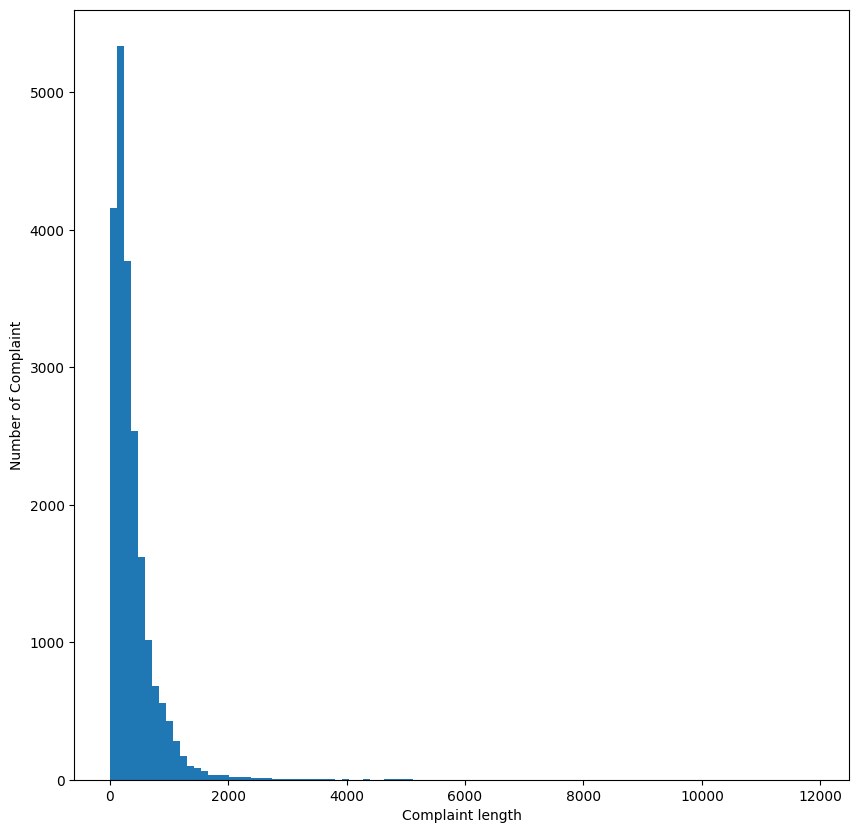

In [21]:
#Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,10))
doc_length = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_length, bins = 100)
plt.ylabel('Number of Complaint')
plt.xlabel('Complaint length')


#### Find the top 40 words by frequency among all the articles after processing the text.

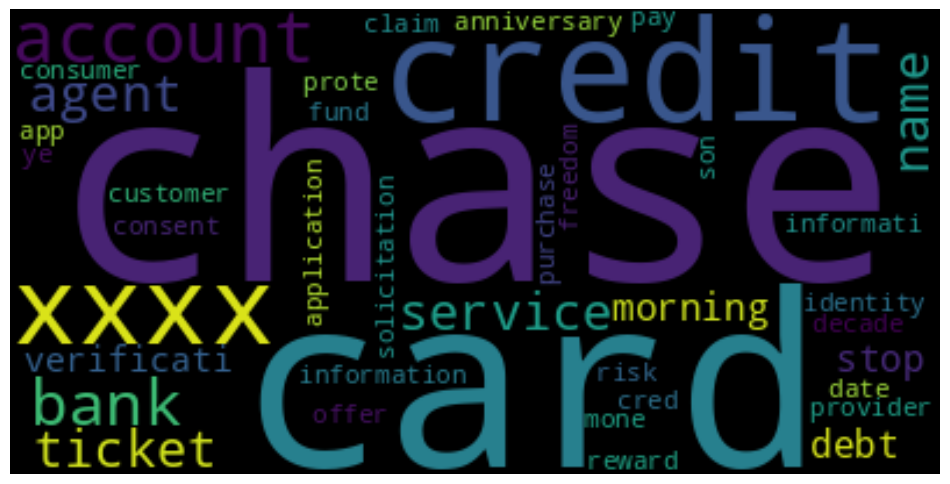

In [22]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
wordcloud = WordCloud(max_words=40, random_state=1, stopwords=set(STOPWORDS))
wordcloud.generate(str(df_clean['complaint_POS_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#Removing -PRON- from the text corpus

df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [24]:
#Generic Function to get n-grams

def get_top_n_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [25]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).

unigram = get_top_n_ngrams(df_clean['Complaint_clean'].values.astype('U'), 30, ngram_range=(1,1))
df_unigram = pd.DataFrame(unigram, columns = ['unigram' , 'count'])
df_unigram

,unigram,count
0,chase,51411
1,account,46348
2,xxxx,33384
3,credit,32558
4,card,30116
5,payment,21162
6,bank,20750
7,time,16033
8,day,12966
9,money,11955


In [26]:
#Print the top 10 words in the unigram frequency

df_unigram_sorted = df_unigram.sort_values(by='count', ascending=False)
df_unigram_sorted.head(10)

,unigram,count
0,chase,51411
1,account,46348
2,xxxx,33384
3,credit,32558
4,card,30116
5,payment,21162
6,bank,20750
7,time,16033
8,day,12966
9,money,11955


In [27]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).

bigram = get_top_n_ngrams(df_clean['Complaint_clean'].values.astype('U'), 30, ngram_range=(2,2))
df_bigram = pd.DataFrame(bigram, columns = ['bigram' , 'count'])
df_bigram

,bigram,count
0,credit card,12836
1,credit report,3843
2,account chase,3146
3,customer service,3057
4,chase account,2913
5,chase credit,2911
6,account account,2681
7,bank account,2517
8,xxxx xxxx,2391
9,chase bank,2070


In [ ]:
#Print the top 10 words in the bigram frequency

df_bigram_sorted = df_bigram.sort_values(by='count', ascending=False)
df_bigram_sorted.head(10)

In [ ]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).

trigram = get_top_n_ngrams(df_clean['Complaint_clean'].values.astype('U'), 30, ngram_range=(3,3))
df_trigram = pd.DataFrame(trigram, columns = ['trigram' , 'count'])
df_trigram

In [ ]:
#Print the top 10 words in the trigram frequency

df_trigram_sorted = df_trigram.sort_values(by='count', ascending=False)
df_trigram_sorted.head(10)

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [31]:
#Remove masked data

df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [ ]:
#All masked texts has been removed
df_clean

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
#Write your code here to initialise the TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.

dtm = tfidf.fit_transform(df_clean.Complaint_clean)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [ ]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [ ]:
#Load your nmf_model with the n_components i.e 5

num_topics = 5 #write the value you want to test out
nmf_model = NMF(n_components=num_topics, random_state=40)

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

In [38]:
#Print the Top15 words for each of the topics

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index }')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['customer', 'transaction', 'number', 'business', 'checking', 'fee', 'day', 'branch', 'deposit', 'chase', 'fund', 'money', 'bank', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC #1
['reason', 'service', 'offer', 'point', 'purchase', 'month', 'year', 'score', 'limit', 'fee', 'account', 'balance', 'chase', 'credit', 'card']


THE TOP 15 WORDS FOR TOPIC #2
['day', 'statement', 'fee', 'property', 'balance', 'rate', 'year', 'time', 'modification', 'home', 'month', 'chase', 'mortgage', 'loan', 'payment']


THE TOP 15 WORDS FOR TOPIC #3
['file', 'application', 'account', 'letter', 'theft', 'score', 'identity', 'debt', 'reporting', 'bureau', 'information', 'company', 'credit', 'report', 'inquiry']


THE TOP 15 WORDS FOR TOPIC #4
['purchase', 'phone', 'company', 'time', 'information', 'service', 'email', 'letter', 'merchant', 'fraud', 'claim', 'dispute', 'transaction', 'chase', 'charge']




In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

In [40]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_results.argmax(axis = 1)

In [41]:
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...,xxxx agent anniversary date agent information ...,agent anniversary date agent information orde...,0
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,card application identity consent service cred...,card application identity consent service cred...,1
11,on while trying to book a xxxx xxxx ticket i c...,on while trying to book a xxxx xxxx ticket i c...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [42]:
#Print the first 5 Complaint for each of the Topics

df_clean.groupby('Topic').head(5).sort_values('Topic')


,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...,xxxx agent anniversary date agent information ...,agent anniversary date agent information orde...,0
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restricted my ...,notice account debit card branch customer serv...,notice account debit card branch customer serv...,0
24,mishandling of this account by chase auto and ...,mishandling of this account by chase auto and ...,account chase auto xxxx,account chase auto,0
52,my roommate was stealing my chase debit card a...,my roommate wa stealing my chase debit card an...,roommate chase debit card driver license money...,roommate chase debit card driver license money...,1
50,i am a senior citizen that has been scammed by...,i am a senior citizen that ha been scammed by ...,citizen company time share company nothing ref...,citizen company time share company nothing ref...,1
40,xxxx xxxx a sofa love seat table and chairs an...,xxxx xxxx a sofa love seat table and chair and...,sofa love seat table chair debit card bank vis...,sofa love seat table chair debit card bank vis...,1
32,my chase amazon card was declined for a cateri...,my chase amazon card wa declined for a caterin...,chase catering order brother funeral amount ch...,chase catering order brother funeral amount ch...,1
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,card application identity consent service cred...,card application identity consent service cred...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [43]:
#Create the dictionary of Topic names and Topics

topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card",
               2:"Mortgage/Loan",
               3:"Others",
               4:"Theft/Dispute Reporting"}





#Replace Topics with Topic Names

df_clean['Topic'] = df_clean['Topic'].map(topic_names)

In [44]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,Bank Account services
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...,xxxx agent anniversary date agent information ...,agent anniversary date agent information orde...,Bank Account services
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,card application identity consent service cred...,card application identity consent service cred...,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i c...,on while trying to book a xxxx xxxx ticket i c...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,Others
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,Bank Account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Credit card or prepaid card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx i called chas my xxxx xx...,xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,Theft/Dispute Reporting
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,xxxx pay risk consumer chase bank app chase ye...,pay risk consumer chase bank app chase year b...,Theft/Dispute Reporting
78311,i have had flawless credit for yrs ive had cha...,i have had flawless credit for yr ive had chas...,credit chase credit card chase freedom problem...,credit chase credit card chase freedom problem...,Credit card or prepaid card


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [45]:
#Create the dictionary again of Topic names and Topics

topic_names = {"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Mortgage/Loan":2,
               "Others":3,
               "Theft/Dispute Reporting":4
               }

#Replace Topics with Topic Names

df_clean['Topic'] = df_clean['Topic'].map(topic_names)

In [46]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
2,i upgraded my xxxx xxxx card in and was told b...,i upgraded my xxxx xxxx card in and wa told by...,xxxx agent anniversary date agent information ...,agent anniversary date agent information orde...,0
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,card application identity consent service cred...,card application identity consent service cred...,1
11,on while trying to book a xxxx xxxx ticket i c...,on while trying to book a xxxx xxxx ticket i c...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx i called chas my xxxx xx...,xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,4
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,xxxx pay risk consumer chase bank app chase ye...,pay risk consumer chase bank app chase year b...,4
78311,i have had flawless credit for yrs ive had cha...,i have had flawless credit for yr ive had chas...,credit chase credit card chase freedom problem...,credit chase credit card chase freedom problem...,1


In [47]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data=df_clean[["complaints","Topic"]]

In [48]:
training_data.shape

(21072, 2)

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [49]:

#Write your code to get the vector count

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaints)

#Write your code here to transform the word vector to tf-idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [50]:
#Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=40)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test:{y_test.shape}")

Shape of X_train: (15804, 33621)
Shape of y_train:(15804,)
Shape of X_test: (5268, 33621)
Shape of y_test:(5268,)


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [62]:
# Write your code here to build any 3 models and evaluate them using the required metrics
def  calculatemodelmetrics(y,y_pred):

   # Display accuracy, recall, f1 score, and confusion matrix

    confusionmatrix = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n")
    print(confusionmatrix)
    print("\n")

    print("Evaluation Metrics : \n")
    print('Accuracy score:\t', metrics.accuracy_score(y, y_pred))
    print('F1 score:\t', f1_score(y, y_pred,average='weighted'))



In [63]:
# Logistic Regression

lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

calculatemodelmetrics(y_test, y_pred_lr)

Confusion Matrix:

[[1246   14   13   10   32]
 [  15  942   14   11   45]
 [  20    8 1236    7   18]
 [  14   22   24  439   17]
 [  64   25   35   10  987]]


Evaluation Metrics : 

Accuracy score:	 0.9206529992406985
F1 score:	 0.9203291647634984


In [64]:
#Decision tree classifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

calculatemodelmetrics(y_test, y_pred_dt)

Confusion Matrix:

[[1034   46   70   41  124]
 [  37  814   27   50   99]
 [  54   45 1091   33   66]
 [  34   38   34  380   30]
 [ 137  101   73   33  777]]


Evaluation Metrics : 

Accuracy score:	 0.7775246772968869
F1 score:	 0.7774283855282468


In [65]:
#Random Forest Classifier

rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

calculatemodelmetrics(y_test, y_pred_rfc)

Confusion Matrix:

[[1239    7   53    0   16]
 [ 209  561  131    5  121]
 [  77   13 1194    0    5]
 [ 101   53  144  171   47]
 [ 289   30  124    1  677]]


Evaluation Metrics : 

Accuracy score:	 0.7293090356871678
F1 score:	 0.7132823909229489


# Model Inference

Based on the the evaluation done with 3 different classification algorithms, Linear Regression provides the best results in terms of accuracy and F1 score. The below sections tries predicting the topic using the Linear Regression model on unseen complaint. As you can see below, the model is able to predict the topic correctly for the complaints given below

In [70]:
#Create the dictionary of Topic names and Topics

topic_names =   { 0 : "Bank account services",
                  1 : "Credit Card/Prepaid Card",
                  2 : "Mortgages/loans",
                  3 : "Others",
                  4 : "Theft/Dispute reporting", }


#Replace Topics with Topic Names

df_clean['Topic'] = df_clean['Topic'].map(topic_names)

In [71]:
def predict_complaint_topic(test_complaint):

  test_complaint = clean_data(test_complaint)
  test_complaint = lemmatization(test_complaint)
  test_complaint = pos_tag(test_complaint)

  # vectorize and tf-idf tranform
  test = count_vect.transform([test_complaint])
  test_tfidf = tfidf_transformer.transform(test)

  # predict
  prediction=lr.predict(test_tfidf)

  return topic_names[prediction[0]]


In [72]:
sample_complaint = 'I tried to make a transaction at a supermarket retail store, using my chase debit/atm card, but the transaction was declined. I am still able to withdraw money out of an ATM machine using the same debit card. Please resolve this issue.'
print("Complaint Category - " ,predict_complaint_topic(sample_complaint))

Complaint Category -  Credit Card/Prepaid Card


In [73]:
sample_complaint = 'I am writing to express my dissatisfaction with the services provided by your bank. The consistently slow response times from customer service, unexpected fees on my account, and recent technical glitches affecting online transactions have created a frustrating experience. The lack of transparency regarding fees is particularly concerning. I urge your prompt attention to these issues to enhance the overall quality of service and restore confidence in your banking services.'
print("Complaint Category - " , predict_complaint_topic(sample_complaint))

Complaint Category -  Bank account services
